#1. Make a binary classification dataset with Scikit-Learn's make_moons() function.

-For consistency, the dataset should have 1000 samples and a random_state=42.

-Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Rodando na {device} \nPytorch version: {torch.__version__}")



Rodando na cpu 
Pytorch version: 2.5.1+cu121


In [ ]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

#separado dados x %80 e y %20
#x é a entrada de dados e y irá receber nossas previsões

train_split = int(0.8*len(X))
x_train, y_train= X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

x_train = torch.tensor(x_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
x_test = torch.tensor(x_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)


len(x_test), len(x_train), len(y_test), len(y_train)

(200, 800, 200, 800)

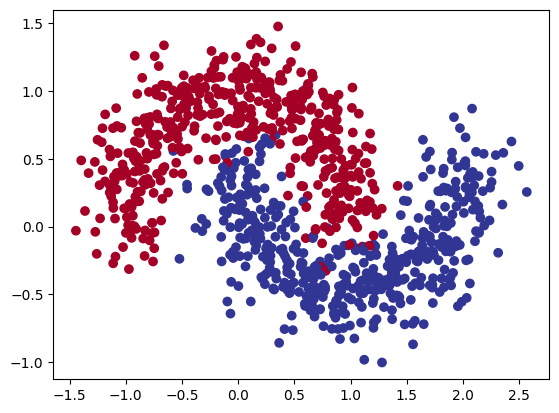

In [ ]:
# Visualize the data on a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

#2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

-Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [ ]:
class MultiLayerPercepetron(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 128),
            nn.Linear(128, 64),
            nn.Linear(64, 32),
            nn.Linear(32, 1),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.layers(x)
        return torch.sigmoid(x).squeeze(1)  # Remove dimensões extras, se existirem


In [ ]:
model = binNetwork().to(device)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


In [ ]:
model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[-0.2411,  0.2549],
                      [ 0.1480,  0.3251],
                      [-0.3973,  0.0818],
                      [-0.6037, -0.2223],
                      [ 0.5017, -0.0670],
                      [-0.2716, -0.6748],
                      [ 0.3138, -0.1276],
                      [-0.6256, -0.5927],
                      [ 0.2146, -0.3339],
                      [ 0.5199, -0.0747],
                      [ 0.3389, -0.5785],
                      [-0.4181, -0.1260],
                      [-0.6454,  0.3493],
                      [-0.1264, -0.0409],
                      [-0.5573, -0.2190],
                      [ 0.2828,  0.3646],
                      [-0.2158,  0.4658],
                      [-0.6070, -0.2816],
                      [-0.6248, -0.1449],
                      [ 0.1622, -0.1420],
                      [ 0.2134, -0.2574],
                      [ 0.0346, -0.6611],
                      [ 0.3214, -0.0527],
 

#3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [ ]:
lossfunc = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

#4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.

-To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.

-Train the model for long enough for it to reach over 96% accuracy.

-The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [ ]:
def train(model, dataloader, loss_func, optimizer):
    model.train()
    cumloss = 0.0

    for X, y in dataloader:
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_func(pred, y)
        loss.backward()
        optimizer.step()

        cumloss += loss.item()

    return cumloss / len(dataloader)

def test(model, dataloader, loss_func):
    model.eval()
    cumloss = 0.0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_func(pred, y)
            cumloss += loss.item()

    return cumloss / len(dataloader)


In [ ]:
epochs = 100
torch.manual_seed(42)

y_pred = (model(x_test) > 0.5).float()
acc = accuracy_score(y_test.to(device), y_pred.to(device))

for epoch in range(epochs):
    train_loss = train(model, train_loader, lossfunc, optimizer)
    test_loss = test(model, test_loader, lossfunc)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {acc:.4f}")


Epoch 0/100: Train Loss: 0.6974, Test Loss: 0.6949, Accuracy: 0.5050
Epoch 10/100: Train Loss: 0.6849, Test Loss: 0.6840, Accuracy: 0.5050
Epoch 20/100: Train Loss: 0.6725, Test Loss: 0.6736, Accuracy: 0.5050
Epoch 30/100: Train Loss: 0.6603, Test Loss: 0.6603, Accuracy: 0.5050
Epoch 40/100: Train Loss: 0.6474, Test Loss: 0.6469, Accuracy: 0.5050
Epoch 50/100: Train Loss: 0.6334, Test Loss: 0.6345, Accuracy: 0.5050
Epoch 60/100: Train Loss: 0.6180, Test Loss: 0.6206, Accuracy: 0.5050
Epoch 70/100: Train Loss: 0.6009, Test Loss: 0.6039, Accuracy: 0.5050
Epoch 80/100: Train Loss: 0.5818, Test Loss: 0.5864, Accuracy: 0.5050
Epoch 90/100: Train Loss: 0.5604, Test Loss: 0.5609, Accuracy: 0.5050


#5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [ ]:
#https://machinelearningmastery.com/plot-a-decision-surface-for-machine-learning/

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min().item() - 0.1, X[:, 0].max().item() + 0.1
    y_min, y_max = X[:, 1].min().item() - 0.1, X[:, 1].max().item() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32).to(device)
    with torch.no_grad():
        preds = model(grid).reshape(xx.shape).cpu().numpy()
    plt.contourf(xx, yy, preds, alpha=0.7, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0].cpu(), X[:, 1].cpu(), c=y.cpu().squeeze(), cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.show()


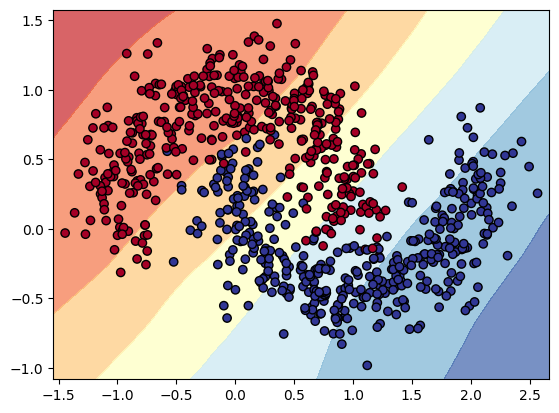

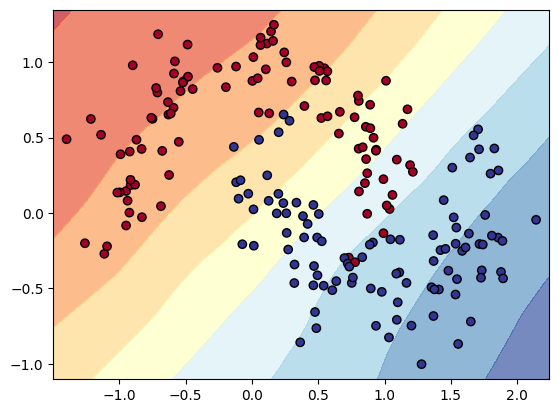

In [ ]:
plot_decision_boundary(model, x_train, y_train)
plot_decision_boundary(model, x_test, y_test)

#6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

-Feel free to reference the ML cheatsheet website for the formula

In [ ]:
tensor_A = torch.arange(-100, 100, 1)

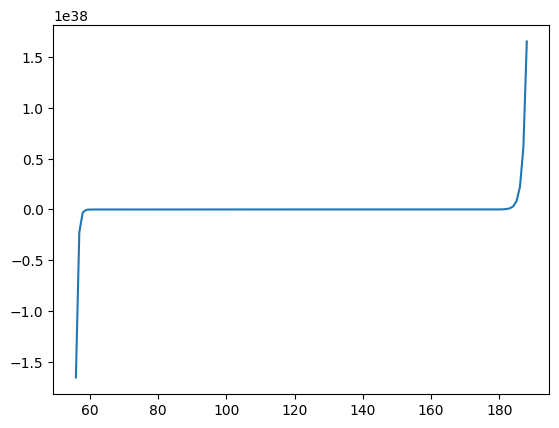

In [ ]:
def tanh(x):
  #https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh
  return (torch.exp(x) - torch.exp(-x) / torch.exp(x) + torch.exp(-x))

plt.plot(tanh(tensor_A))

#7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).

-Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).

-Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).

-Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).

-Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

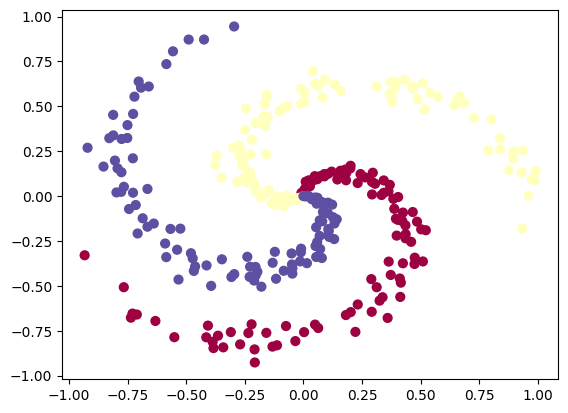

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
class multilayerNetwork(nn.Module):
  def __init__(self):
    super().__init__(self)
    self.layers = nn.Sequential(
        nn.Linear(1,32),
        nn.ReLU(),
        nn.Linear(16, 8),
        nn.ReLU()
    )
  def forward(self, x):
    pass

In [ ]:
n_loss = nn.MSELoss
n_optmizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)
